In [1]:
import numpy as np 
import pandas as pd 
import os
Dir = "D:/python_enviroments/PythonCodes/数据挖掘/期末作业/"
pklDir =  "D:/python_enviroments/PythonCodes/数据挖掘/期末作业/pkl/"
data=pd.read_csv(Dir+"/google-play-store-apps/googleplaystore_user_reviews.csv",encoding="utf-8")

In [2]:
# 由于只需要判别是不是消极评论，只需要评论和积极性即可
data=pd.concat([data.Translated_Review,data.Sentiment],axis=1)
data.dropna(axis=0,inplace=True) 
data.tail()

,Translated_Review,Sentiment
64222,Most ads older many agents ..not much owner po...,Positive
64223,"If photos posted portal load, fit purpose. I'm...",Positive
64226,"Dumb app, I wanted post property rent give opt...",Negative
64227,I property business got link SMS happy perform...,Positive
64230,"Useless app, I searched flats kondapur, Hydera...",Negative


In [3]:
# 将标称型数值改为数值型
data.Sentiment.unique() 
data.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in data.Sentiment]

Text(0.5, 1.0, 'Count of Sentiments')

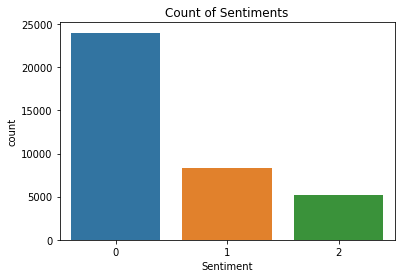

In [4]:
# 对不同情感的评论进行作图
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data.Sentiment)
plt.title("Count of Sentiments")

In [5]:
data.Sentiment.value_counts()

0    23998
1     8271
2     5158
Name: Sentiment, dtype: int64

Most used 50 words:  ['ability', 'able', 'about', 'absolutely', 'access', 'account', 'accurate', 'across', 'action', 'activity', 'actual', 'actually', 'ad', 'add', 'added', 'addicted', 'addicting', 'addictive', 'adding', 'advert', 'advertisement', 'after', 'again', 'age', 'ago', 'alarm', 'alert', 'all', 'allow', 'allows', 'almost', 'along', 'alot', 'already', 'also', 'although', 'always', 'am', 'amazing', 'amazon', 'amount', 'an', 'and', 'android', 'anime', 'annoying', 'another', 'answer', 'any', 'anymore']


D:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


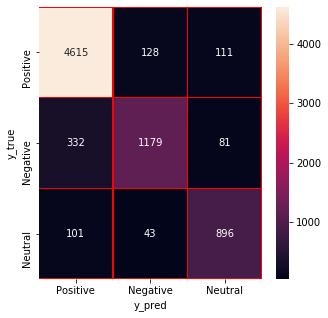

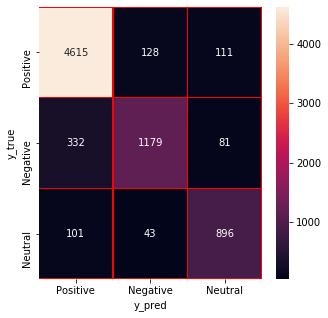

In [6]:
# 使用nltk去除停用词
import nltk  ## Natural Language Tool Kit
from nltk.corpus import stopwords 
# 正则化，去除标点符号且小写，并输出一个样例
import re 
from sklearn.feature_extraction.text import CountVectorizer

text_list=[]
for i in data.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nltk.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

max_features=1000
cou_vec=CountVectorizer(max_features=max_features) # stop_words="english" you can add but we have already applied it.
sparce_matrix=cou_vec.fit_transform(text_list).toarray()
all_words=cou_vec.get_feature_names()
print("Most used 50 words: ",all_words[0:50])
y = data.iloc[:,1].values
x = sparce_matrix
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=1)
lr = joblib.load(pklDir+'/lr.pkl')
rf = joblib.load(pklDir+'/rf.pkl')

y_pred = rf.predict(xtest)
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

y_pred=lr.predict(xtest)
from sklearn.metrics import confusion_matrix
import seaborn as sns
names=["Positive","Negative","Neutral"]
cm=confusion_matrix(ytest,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()